<a href="https://colab.research.google.com/github/Sirrat21/AI-ML-internship-tasks/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance scikit-learn matplotlib --quiet

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
stock_symbol = 'AAPL'

In [ ]:
df = yf.download(stock_symbol, period='2y')


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head(8)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-06-12,181.968079,182.067093,179.176041,179.473070,54274900
2023-06-13,181.492859,182.324528,180.631488,180.987920,54929100
2023-06-14,182.126480,182.562121,180.215620,181.552228,57462900
2023-06-15,184.166077,184.671031,181.958187,182.136410,65433200
2023-06-16,183.086899,185.136386,182.443348,184.878954,101235600
2023-06-20,183.175980,184.255186,182.581937,182.581937,49799100
2023-06-21,182.136383,183.572006,180.779954,183.067052,49515700
2023-06-22,185.146271,185.195778,181.849279,181.918593,51245300


In [ ]:
df['Next_Close'] = df['Close'].shift(-1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Prediction**

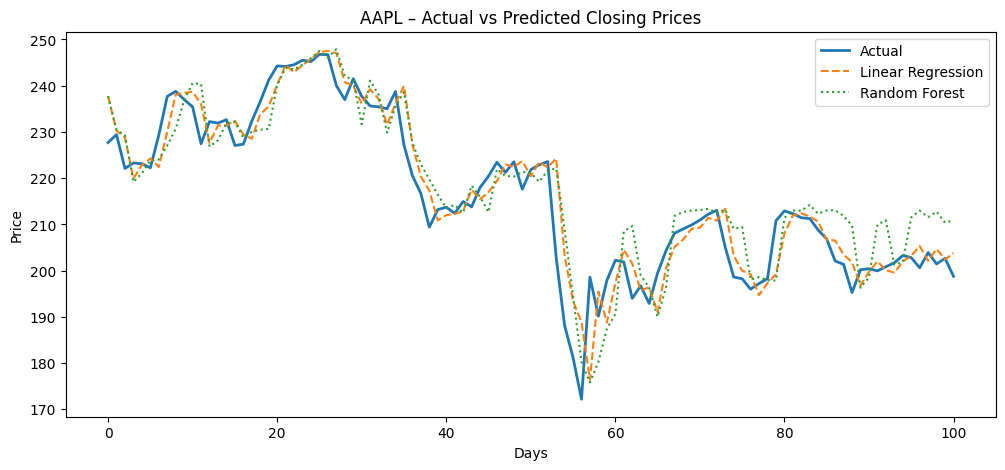

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(lr_preds, label='Linear Regression', linestyle='--')
plt.plot(rf_preds, label='Random Forest', linestyle=':')
plt.title(f'{stock_symbol} – Actual vs Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

**Linear Regression**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [ ]:
r2_score(y_test, lr_preds)

0.8831647302709418

**Random Forest**

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:
r2_score(y_test, rf_preds)

0.7993485038594653

**RMSE (Root Mean Squared Error)**

In [ ]:
np.sqrt(mean_squared_error(y_test, rf_preds))

np.float64(7.5285467133321555)

In [ ]:
value = np.float64(7.5285467133321555)

In [ ]:
print (value)

7.5285467133321555


# **Conclusion**

We used stock data to predict the next day’s closing price.

Random Forest gave **better** results than Linear Regression.

Predictions were close to actual prices, showing the model can capture
short-term trends.